# DIC(4/587): Phase 1
---

Deliverables
---
1. **Problem Statement:** Form a title and problem statement that clearly state the problem
and questions you are trying to answer. Additionally:
    - Discuss the background of the problem leading to your objectives. Why is it a significant problem?
    - Explain the potential of your project to contribute to your problem domain. Discuss why this contribution is crucial?
2. **Data Sources:** Collect your data. Your data can come from multiple sources.
    - For example, Medical, Bank, sports, health, Kaggle, Amazon reviews, Twitter, Youtube, Reddit, etc. 
    - This data has to be large enough for the data analysis to yield significance. At least 2000 rows.
3. **Data Cleaning/Processing:** Your dataset has to be cleaned and properly processed. Please submit a report where you explain each processing/cleaning step properly. We expect to see comments and markup for this step. 
    - In order to get full marks you must clearly document 7 (10 for 587 students) distinct processing/cleaning operations.
4. **Exploratory Data Analysis (EDA):** Perform exploratory data analysis as defined in the NIST publication [2] and as originally described by John Tukey [4,5]. Record the outcomes and what you learned and how you will use this information.
    - For example, in choosing features (columns) and dropping columns, and in short feature engineering. 
    - You need to demonstrate 7 (10 for 587 students) different, significant and relevant EDA operations and describe how you used these to process the data sets further to provision them for downstream modeling and analytics. Figures and tables should be included where relevant.

Construction Permits in Austin, TX
---
**Problem Statement:**
- The problem statement is to predict the annual revenue from the construction permits. Some questions that we are trying to answer are, in Austin Texas what is the breakdown of the residential permits that were approved. Who might be the most popular contractor out of the permits? We are also trying to find if there is any relationship between the amount of a job valuation to the structure and size of the lot.

**Motivation:**
- The motivation for this project would be to ensure proper supply chain demands within the current supply chain issues. Ensuring all materials and projects to be completed within the designated time for company's to hit their revenue go as well as making sure all the resident's constructions are within their estimated time and expenses. 
- A motivation would be especially nowadays during the aftermath of global supply shortages, construction costs have increased tremedously. From a company's standpoint as well as a resident's standpoint, there would need to be a way to predict the amount of money that needs to be saved for a specific construction project. 
- Sometimes because of the increasing in prices, the construction project and plans would need to be delayed. It is an inconvenience to the resident, the resident's neighborhood, and contribute to overall delay of plans. 

**Data Source:**
- [Issued Construction Permits - data.austintexas.gov](https://data.austintexas.gov/Building-and-Development/Issued-Construction-Permits/3syk-w9eu)

    *Note: CSV in use for this project will be slightly altered to reduce file size. (Original Size: 1.29GB)*

**Things to Consider:**
- The values in the Total Job Valuation column are often N/A or valued at $0

## Initial Cleaning/Filtering
The original file had a file size of 1.29GB and contained over 2 million rows of data. 
To reduce the dataset we wish to work with we initially removed unneccesary columns and decided to focus primarily on residential construction.
There were several instances where the total job valuation were either N/A or had a value of 0. 
To better determine which job was paid for we removed those instances.
As there were records of data since 1921, we wanted to take in only the recent years since 2017.
By performing all of these, we managed to reduce the file to 26.5MB, with approximately 56,000 rows of data.
```
original_data = pd.read_csv('Dataset/Issued_Construction_Permits.csv')
original_data = original_data.drop(['Link','Location','Contractor Address 1','Contractor Address 2','Applicant Phone','Applicant Address 1','Applicant Address 2'],axis=1)
original_data = original_data[original_data['Permit Class Mapped'] == 'Residential']
original_data = original_data[original_data['Total Job Valuation'] > 0]
original_data = original_data[original_data['Calendar Year Issued'] >= 2017]

original_data.to_csv('Dataset/ICP_Residential_Austin2017up.csv',index=False)
```
- *Original File:* Issued_Construction_Permits.csv
- *Outputted File:* ICP_Residential_Austin2017up.csv

## Data Cleaning / Processing

- Deleting rows
- Changing categorical data from strings into categorical in numbers
- Deleting columns
    - Deleting contractor information 
- Scaling the data sets into normalizing it

***SEE IF WE DID THIS***
- Changing date and time into their specific types
    - To calculate duration
- 

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
data = pd.read_csv('Dataset/ICP_Residential_Austin2017up.csv')
data.shape

(55976, 61)

## Visualizing Various Types of Permits Issued Along with its Purpose

Upon first glance of the dataset, there exists 5 different types of construction permits that were issued: 
- Building Permits
- Mechanical Permits
- Plumbing Permits
- Driveway/Sidewalk Permits
- Electrical Permits

To gain a rough insight as to what our dataset holds, we started off with visualizing the number of permits issued through the years 2017-2022, taking into account of different construction permits as well as the general purpose for each of those permits.

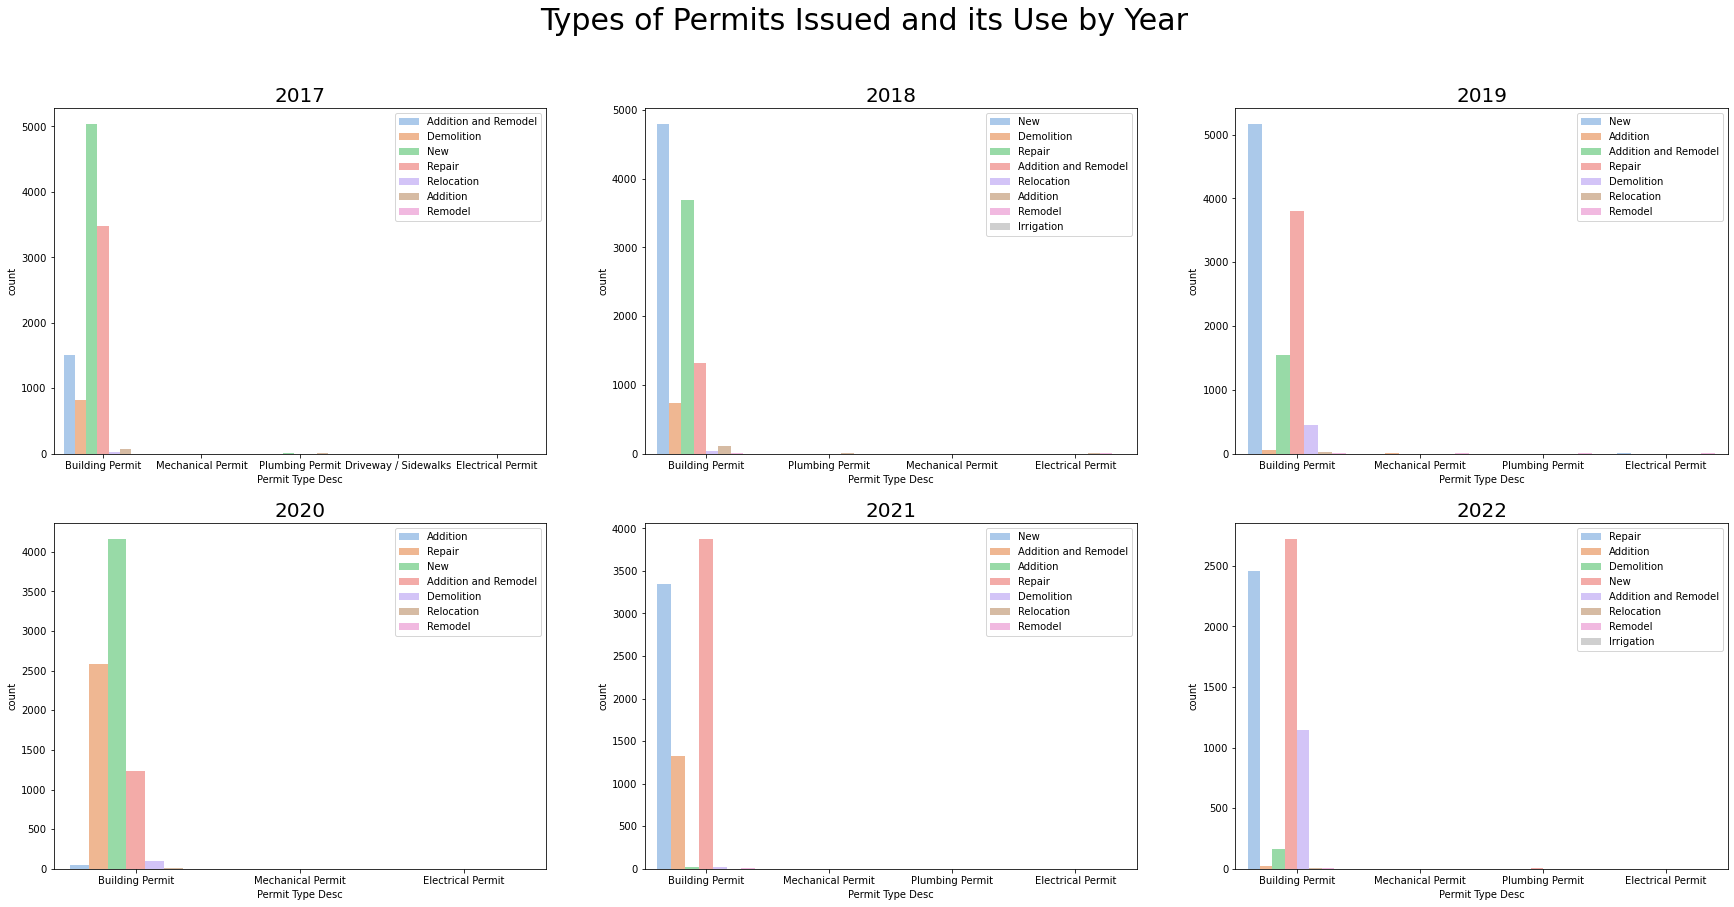

In [60]:
# Count of Permit Types Issued from Years 2017-2022
fig, axes = plt.subplots(2,3,figsize=(30,14))
fig.suptitle('Types of Permits Issued and its Use by Year',size=30)
# Count Plots
sns.countplot(ax=axes[0,0],data=data[data['Calendar Year Issued']==2017],x='Permit Type Desc',hue='Work Class',palette='pastel')
axes[0,0].set_title('2017',size=20)
axes[0,0].legend(loc='upper right')
sns.countplot(ax=axes[0,1],data=data[data['Calendar Year Issued']==2018],x='Permit Type Desc',hue='Work Class',palette='pastel')
axes[0,1].set_title('2018',size=20)
axes[0,1].legend(loc='upper right')
sns.countplot(ax=axes[0,2],data=data[data['Calendar Year Issued']==2019],x='Permit Type Desc',hue='Work Class',palette='pastel')
axes[0,2].set_title('2019',size=20)
axes[0,2].legend(loc='upper right')
sns.countplot(ax=axes[1,0],data=data[data['Calendar Year Issued']==2020],x='Permit Type Desc',hue='Work Class',palette='pastel')
axes[1,0].set_title('2020',size=20)
axes[1,0].legend(loc='upper right')
sns.countplot(ax=axes[1,1],data=data[data['Calendar Year Issued']==2021],x='Permit Type Desc',hue='Work Class',palette='pastel')
axes[1,1].set_title('2021',size=20)
axes[1,1].legend(loc='upper right')
sns.countplot(ax=axes[1,2],data=data[data['Calendar Year Issued']==2022],x='Permit Type Desc',hue='Work Class',palette='pastel')
axes[1,2].set_title('2022',size=20)
axes[1,2].legend(loc='upper right')

As shown in the figure above, we can see that building permits account to a vast majority of the dataset with certain permits having little to no use during some of the years.

## Separately Portraying Counts for Building and Non-Building Permits
We will separate the subplots into 2 different categories: Building Permits and Non-Building Permits. The reasoning relates to what we found from the previous figure and how the data dealing with Building Permits greatly differs from the rest and masks what the counts are for Non-Building Permits. To start off, we will plot the counts of just the amount of permits issued over the years.

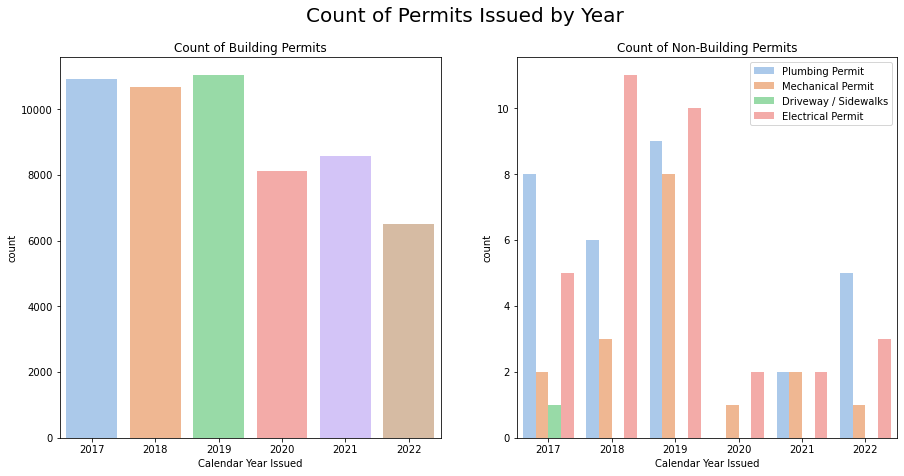

In [78]:
# Separate Plots for Building and Non-Building Permits
fig, axes = plt.subplots(1,2,figsize=(15,7))
fig.suptitle('Count of Permits Issued by Year',size=20)
# Count Plots
sns.countplot(ax=axes[0],data=data[data['Permit Type Desc']=="Building Permit"],x='Calendar Year Issued',palette='pastel')
axes[0].set_title('Count of Building Permits')
sns.countplot(ax=axes[1],data=data[data['Permit Type Desc']!="Building Permit"],x='Calendar Year Issued',hue='Permit Type Desc',palette='pastel')
axes[1].set_title('Count of Non-Building Permits')
axes[1].legend(loc='upper right')

While observing the figure above, we can see that the number of permits issued overall were slightly consistent from 2017-2019 but then saw a decline afterwards during the span of 2020-2022, with the number of Non-Building Permits issued drastically decline when compared to the number of Building Permits issued.

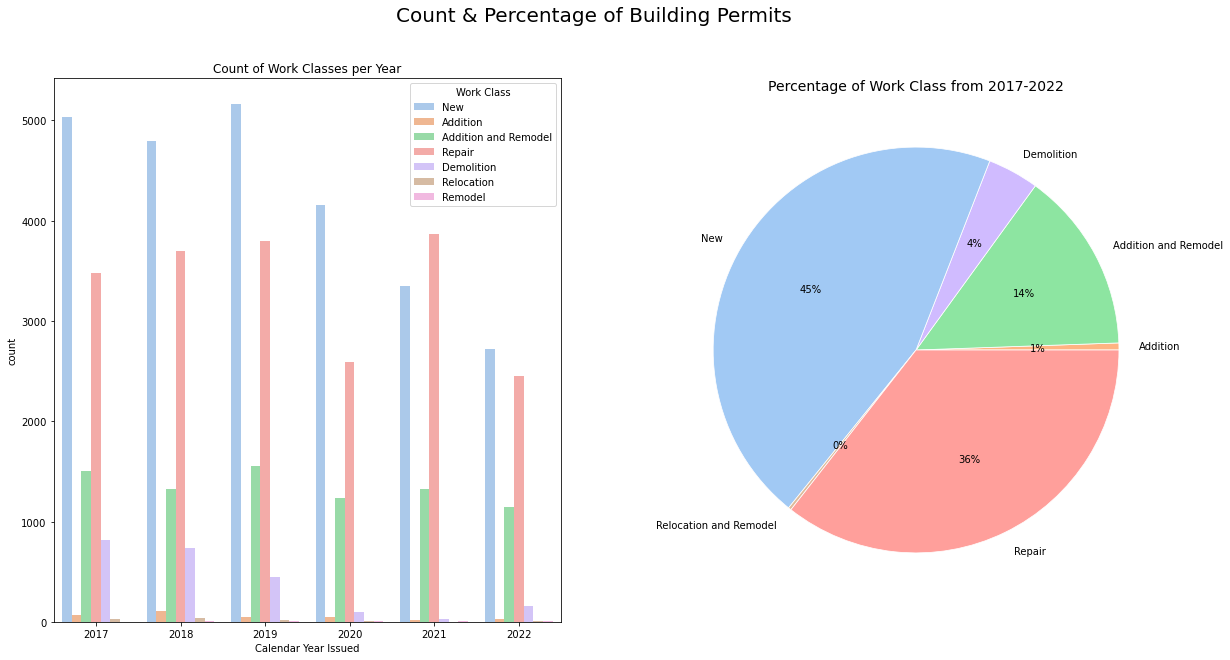

In [79]:
# Count & Percentage of Building Permits
fig, axes = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('Count & Percentage of Building Permits',size=20)
# For ease of use, created a separate copy of a dataframe containing only Building Permits
build_data=data[data['Permit Type Desc']=="Building Permit"]
# Count Plot
sns.countplot(ax=axes[0],data=build_data,x='Calendar Year Issued',hue='Work Class',palette='pastel')
axes[0].set_title('Count of Work Classes per Year')
# Creating a series containing counts of work class performed to be used as input for pie chart
pieData=build_data.groupby('Work Class').count()['Total Job Valuation']
# Relocation and Remodel have been combined as both were relatively low in comparison to other work classes (Relocation:100, Remodel:31)
pieData['Relocation and Remodel'] = pieData['Relocation']+pieData['Remodel']
pieData = pieData.drop(['Remodel','Relocation']).reindex(index = ['Addition','Addition and Remodel','Demolition','New','Relocation and Remodel','Repair'])
# Pie Chart
c = sns.color_palette('pastel')[0:6]
colors = c[1:3]+[c[4],c[0],c[5],c[3]]
axes[1].pie(pieData,labels=list(pieData.index.values),colors=colors,autopct='%.0f%%',wedgeprops = { 'linewidth' : 0.75, 'edgecolor' : 'white' })
axes[1].set_title("Percentage of Work Class from 2017-2022", fontsize=14);


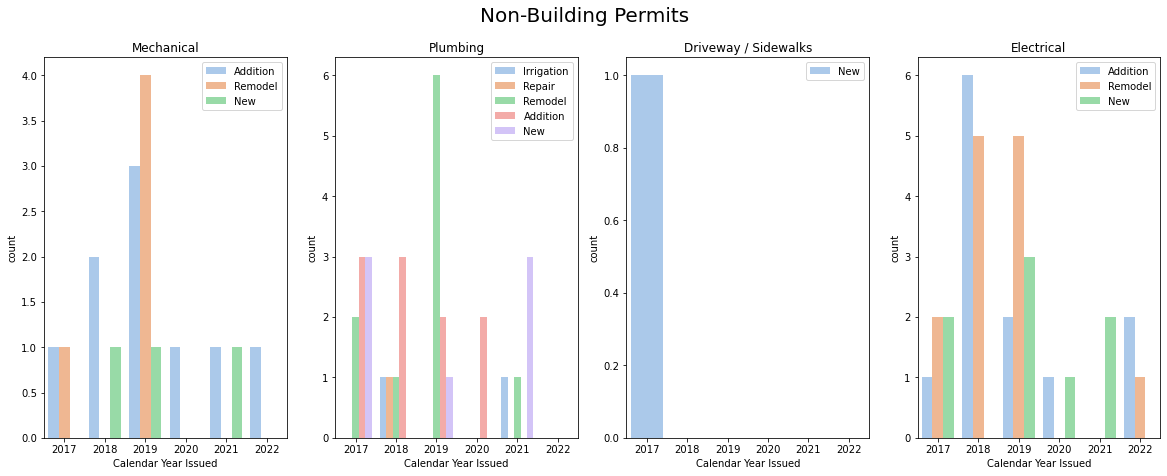

In [41]:
# Count of Non-Building Permits
fig, axes = plt.subplots(1,4,figsize=(20,7),sharex=True)
fig.suptitle('Non-Building Permits',size=20)
# Count Plots per Permit Type
sns.countplot(ax=axes[0],data=data[data['Permit Type Desc']=="Mechanical Permit"],x='Calendar Year Issued',hue='Work Class',palette='pastel')
axes[0].set_title('Mechanical')
axes[0].legend(loc='upper right')
sns.countplot(ax=axes[1],data=data[data['Permit Type Desc']=="Plumbing Permit"],x='Calendar Year Issued',hue='Work Class',palette='pastel')
axes[1].set_title('Plumbing')
axes[1].legend(loc='upper right')
sns.countplot(ax=axes[2],data=data[data['Permit Type Desc']=="Driveway / Sidewalks"],x='Calendar Year Issued',hue='Work Class',palette='pastel')
axes[2].set_title('Driveway / Sidewalks')
axes[2].legend(loc='upper right')
sns.countplot(ax=axes[3],data=data[data['Permit Type Desc']=="Electrical Permit"],x='Calendar Year Issued',hue='Work Class',palette='pastel')
axes[3].set_title('Electrical')
axes[3].legend(loc='upper right')